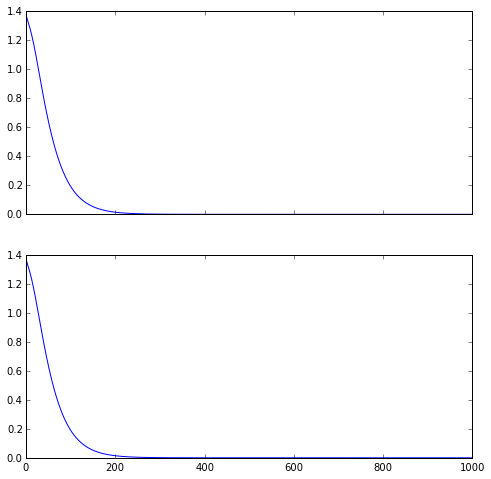

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline
plt.close()

# This function is for Question (7)
# Find the difference of v and v_svd according to their directions
# Input: vecteur v and vecteur got by SVD v_svd(with shape (n,1))
def equalToSVD(v,v_svd): 
    test_sub = abs(np.subtract(v,v_svd))
    test_add = abs(np.add(v,v_svd))
    if(np.mean(test_sub) < np.mean(test_add)): #The vectors v and v_svd are in the same direction
        result = np.linalg.norm(np.subtract(v,v_svd))
    else: #v and v_svd are in the oppesite direction
        result = np.linalg.norm(np.add(v,v_svd))
    return result       # Return: [float]

# Function: Power Iteration
def powerIteration(X,n_iter,u0,v0):     #X: (p,n)
    u = u0
    v = v0
    # Question (7)
    identi_u = np.zeros(n_iter)
    identi_v = np.zeros(n_iter)
    # Question (6)
    # Get the shape of matrix X:
    p,n = X.shape[0],X.shape[1]         # X: (p*n) 
    for j in range(0,n_iter):
        u = np.dot(X,v)
        v = np.dot(X.T,u)
        u = u*(1/np.linalg.norm(u))
        v = v*(1/np.linalg.norm(v))
        # The folowing lines are for Question (7)
        identi_u[j] = equalToSVD(u,u_svd)
        identi_v[j] = equalToSVD(v,v_svd)
        # End of code for Question (7)
    return u,v,identi_u,identi_v

n, p = 100,2000
X = np.random.randn(p,n)*2
n_iter = 1000
# SVD
u_SVD,s,v_SVD = np.linalg.svd(X, full_matrices=1,compute_uv=1)
u_svd = u_SVD.T[0].reshape((p,1))
v_svd = v_SVD[0].reshape((n,1))
# puissance itérée
u0 = np.random.randn(p,1)   
v0 = np.random.randn(n,1)
#u0 = np.ones((p,1))
#v0 = np.ones((n,1))
# Call the function
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
fig, axes = plt.subplots(2,1, sharex = True, figsize=(8,8))
axes[0].plot(identi_u)
axes[1].plot(identi_v)
plt.show()

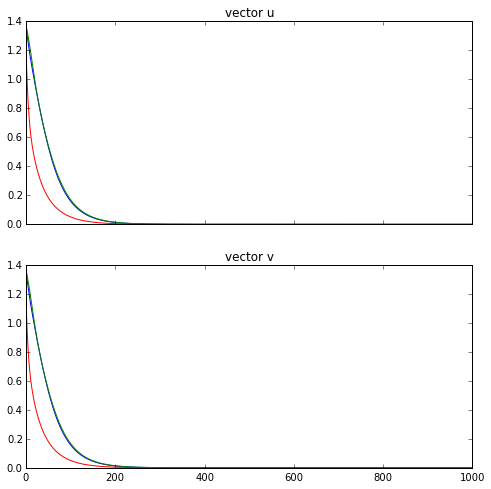

In [244]:
# (8)
fig, axes = plt.subplots(2,1, sharex = True, figsize=(8,8))
# a.random
u0 = np.random.randn(p,1)   
v0 = np.random.randn(n,1)
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
axes[0].plot(identi_u,'b')
axes[1].plot(identi_v,'b')
# b.ones
u0 = np.ones((p,1))
v0 = np.ones((n,1))
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
axes[0].plot(identi_u,'g')
axes[1].plot(identi_v,'g')
# c.uniform
u0 = np.zeros((p,1))
u0[0] = 1
v0 = np.zeros((n,1))
v0[0] = 1
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
axes[0].plot(identi_u,'r')
axes[0].set_title("vector u")
axes[1].plot(identi_v,'r')
axes[1].set_title("vector v")
plt.show()

In [256]:
# (9)
s = np.dot(np.dot(u.T, X),v)[0][0]  #<type 'numpy.float64'>
X_2 = np.subtract(X,s*np.dot(u,v.T))
u_2,v_2,_,_ = powerIteration(X_2,n_iter,u0,v0)
s_2 = np.dot(np.dot(u_2.T, X_2),v_2)[0][0]
print s
print u_2.shape
print v_2.shape
print X_2.shape
print s_2

108.522167941
(2000, 1)
(100, 1)
(2000, 100)
107.223136153


#Backup

In [24]:
u = np.array([
 [-0.33295294],
 [-0.06009906],
 [-0.11870867],
 [-0.21170246],
 [ 0.90918687]])
print abs(u)
print u.shape[0]

[[ 0.33295294]
 [ 0.06009906]
 [ 0.11870867]
 [ 0.21170246]
 [ 0.90918687]]
5


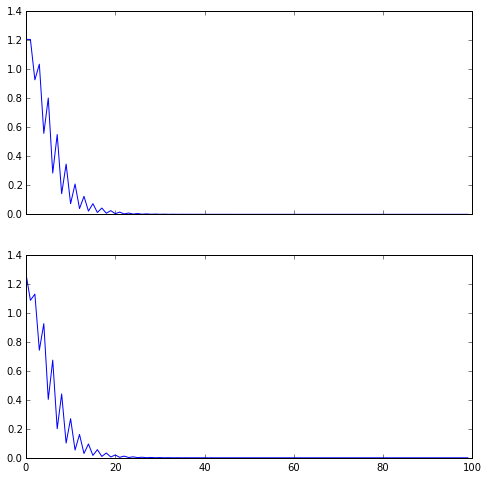

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline
plt.close()

n, p = 5,20
X = np.random.randn(p,n)
n_iter = 100
identi_u = np.zeros(n_iter)
identi_v = np.zeros(n_iter)
#SVD
u_SVD,s,v_SVD = np.linalg.svd(X, full_matrices=1,compute_uv=1)
u_svd = u_SVD.T[0].reshape((p,1))
v_svd = v_SVD[0].reshape((n,1))
#puissance itérée
u0 = np.ones((p,1))
v0 = np.ones((n,1))
for j in range(0,n_iter):
    u = np.dot(X,v0)
    v = np.dot(X.T,u0)
    u = u*(1/np.linalg.norm(u))
    v = v*(1/np.linalg.norm(v))
    # The folowing lines are for Question (7)
    identi_u[j] = equalToSVD(u,u_svd)
    identi_v[j] = equalToSVD(v,v_svd)
    # End of code for Question (7)
    u0,v0 = u,v
fig, axes = plt.subplots(2,1, sharex = True, figsize=(8,8))
axes[0].plot(identi_u)
axes[1].plot(identi_v)
plt.show()

In [ ]:
for j in range(0,n_iter):